# Matching: Koalas on Fire

##### By Magali de Bruyn and Svitlana Midianko

<font size="1"><i>Please find the complementary Medium post <a href="https://medium.com/@svitlana_78975/matching-koalas-on-fire-134ad3d2822">here</a>.</i></font>
<br>
<font size="1"><i>Note: to run the notebook successfully - please run the functions from the Appendix first</i></font>

---

## Data (self-constructed) exploration

In [5]:
# Load relevant libraries
library(Matching)

Loading required package: MASS
## 
##  Matching (Version 4.9-6, Build Date: 2019-04-07)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



## Dataset 1 

In [2]:
food_kilos <- c(180, 200, 225, 250, 270)
tr <- c(0,  1, 0, 1, 0)
data <- cbind(food_kilos, tr)

In [3]:
# M = 1 matching
genout_m1<- GenMatch(X = food_kilos, Tr = tr, M=1,  pop.size=200, max.generations=10, wait.generations=25, ties = FALSE) # genetic matching 
# to find weights for covariates
matchout_m1 <- Match(X = food_kilos, Tr = tr, M=1, Weight.matrix=genout_m1, ties = FALSE) # using derived from GenMatch function 
# covariates' weights to match the treated & controls
matchout_m1$index.control # deriving the control unit indeces for control units
matchout_m1$index.treated # and for treated units 

mb.out_m1 <- MatchBalance(tr~food_kilos, match.out = matchout_m1)  # measuring the balance before and after matching
mb.out_m1$BMsmallest.p.value # smallest p-value before matching (NO matching) 
mb.out_m1$AMsmallest.p.value # and after matching 

Loading required namespace: rgenoud




Mon Dec 16 11:10:53 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 1.000000e+00  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 5

[1] 2 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........        225 	 	        225 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....         20 	 	         20 
med  raw eQQ diff.....         20 	 	         20 
max  raw eQQ diff.....         20 	 	         20 

mean eCDF diff........        0.2 	 	       0.25 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	        0.5 

var ratio (Tr/Co).....    0.61728 	 	    0.30864 
T-test p-value........          1 	 	          1 
KS Bootstrap p-value..      0.924 	 	      0.888 
KS Naive p-value......          1 	 	          1 
KS Statistic..........    0.33333 	 	        0.5 



[1] 0.924

[1] 0.888

In [4]:
# M = 2 matching
genout_m2<- GenMatch(X = food_kilos, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25)

matchout_m2 <- Match(X = food_kilos, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~food_kilos, match.out = matchout_m2)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Mon Dec 16 11:10:58 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.996333e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........        225 	 	        225 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....         20 	 	       22.5 
med  raw eQQ diff.....         20 	 	       22.5 
max  raw eQQ diff.....         20 	 	         25 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....    0.61728 	 	    0.61728 
T-test p-value........          1 	 	          1 
KS Bootstrap p-value..      0.906 	 	      0.982 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.906

[1] 0.982

#### What's going on? 1:2 is better than no matching and better than 1:1 [1:1 < NO < 1:2 == 0.88 < 0.92 < 0.97]

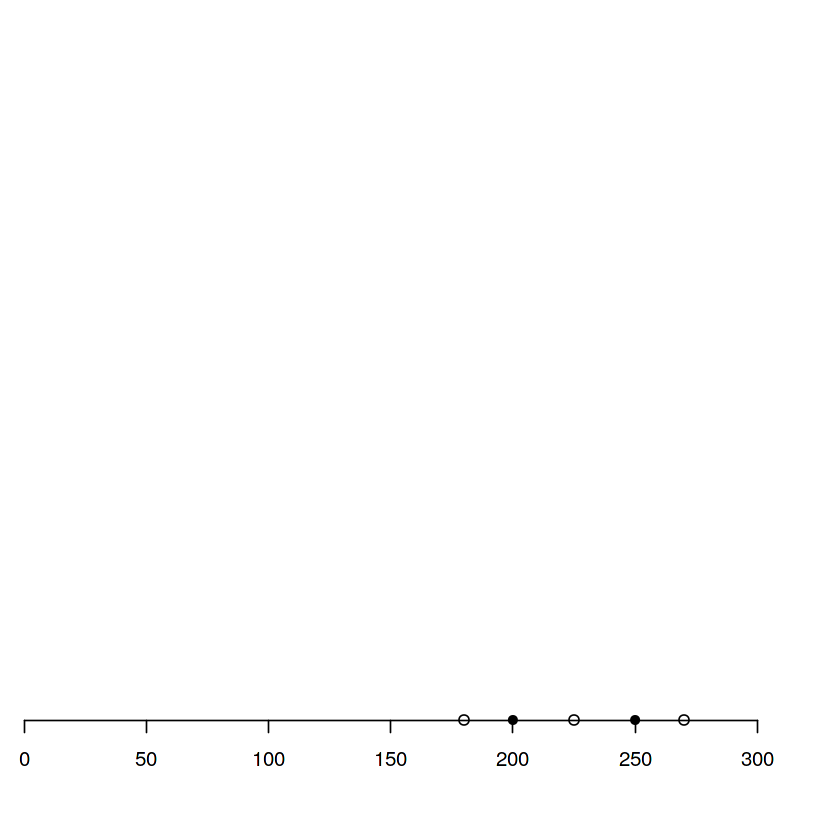

In [12]:
# plotting graphs displaying the 'raw' data. Filled dot - treated unit, empty dot - control unit
# NOTE: find the functions definitions in the Appendix
plot_data(food_kilos, tr, m_num = 1) 

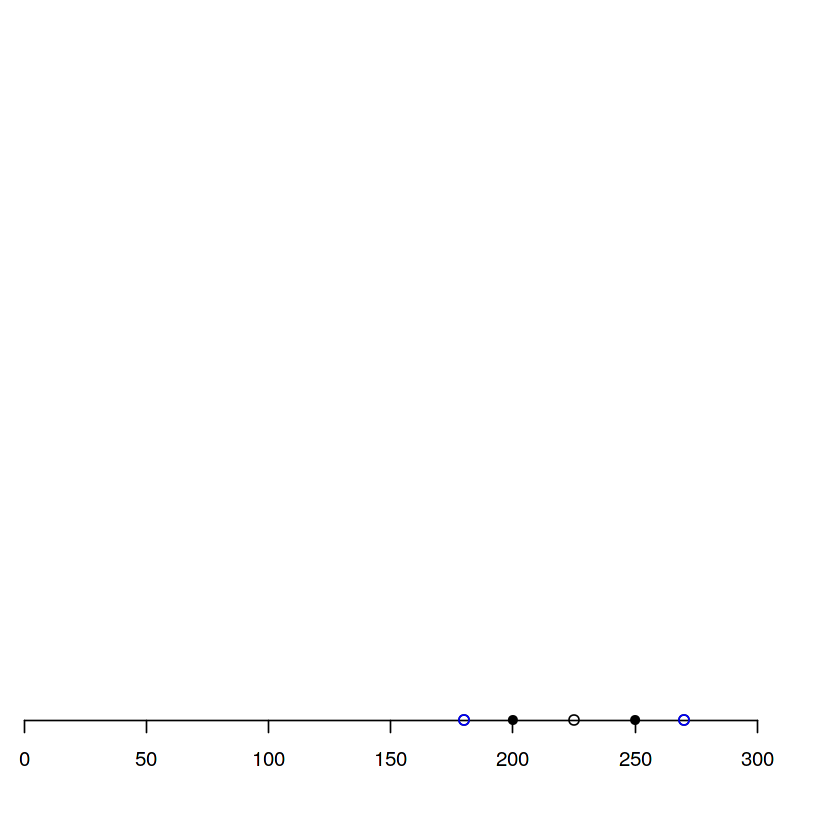

In [13]:
# plotting a graph with treated and 'synthetic' controls, when M = 1
synth_cont <- add_m_control(matchout_m1, data, m_num =1)
plot_data(food_kilos, tr, synth_cont, m_num = 1)

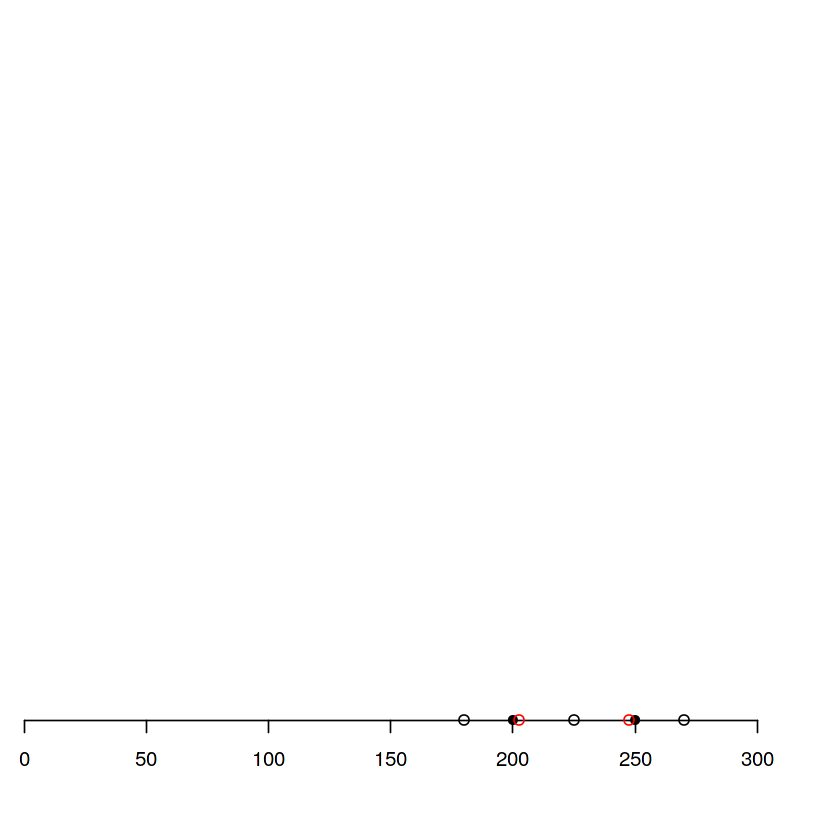

In [14]:
# plotting a graph with treated and 'synthetic' controls, when M = 2
synth_cont <- add_m_control(matchout_m2, data, m_num =2)
plot_data(food_kilos, tr, synth_cont, m_num = 2)


---

## Dataset 2

In [15]:
food_kilos <- c(170, 200, 220, 250, 270)
tr <- c(0,1,0, 1, 0)
data <- cbind(food_kilos, tr)

In [16]:
# M=1 matching
genout_m1<- GenMatch(X = food_kilos, Tr = tr, M=1,  pop.size=200, max.generations=10, wait.generations=25)
matchout_m1 <- Match(X = food_kilos, Tr = tr, M=1, Weight.matrix=genout_m1)
matchout_m1$index.control
matchout_m1$index.treated

mb.out_m1 <- MatchBalance(tr~food_kilos, match.out = matchout_m1, data = data)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value



Mon Dec 16 11:15:12 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 0.000000e+00  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 3 5

[1] 2 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........        220 	 	        245 
std mean diff.........     14.142 	 	    -56.569 

mean raw eQQ diff.....         25 	 	         20 
med  raw eQQ diff.....         25 	 	         20 
max  raw eQQ diff.....         30 	 	         20 

mean eCDF diff........        0.2 	 	       0.25 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	        0.5 

var ratio (Tr/Co).....        0.5 	 	          1 
T-test p-value........    0.90443 	 	 < 2.22e-16 
KS Bootstrap p-value..      0.912 	 	      0.904 
KS Naive p-value......          1 	 	          1 
KS Statistic..........    0.33333 	 	        0.5 



[1] 0.9044305

[1] 0

#### What's going on? No matching is better than 1:1 matching [1:1 < NO == 0 < 0.9]

In [18]:
# M=2 matching
genout_m2<- GenMatch(X = food_kilos, Tr = tr, M=2)

matchout_m2 <- Match(X = food_kilos, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~food_kilos, match.out = matchout_m2, data = data)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value


Warning message in GenMatch(X = food_kilos, Tr = tr, M = 2):
“The key tuning parameters for optimization were are all left at their default values.  The 'pop.size' option in particular should probably be increased for optimal results.  For details please see the help page and http://sekhon.berkeley.edu/papers/MatchingJSS.pdf”



Mon Dec 16 11:15:17 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	15
	(2) Uniform Mutation.................. 	12
	(3) Boundary Mutation................. 	12
	(4) Non-Uniform Mutation.............. 	12
	(5) Polytope Crossover................ 	12
	(6) Simple Crossover.................. 	12
	(7) Whole Non-Uniform Mutation........ 	12
	(8) Heuristic Crossover............... 	12
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum Nonchanging Generations: 4
Population size       : 100
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 8.245203e-01  9.996333e-01  
#unique......... 100, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........        220 	 	        220 
std mean diff.........     14.142 	 	     14.142 

mean raw eQQ diff.....         25 	 	         25 
med  raw eQQ diff.....         25 	 	         25 
max  raw eQQ diff.....         30 	 	         30 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....        0.5 	 	        0.5 
T-test p-value........    0.90443 	 	    0.82452 
KS Bootstrap p-value..      0.906 	 	       0.98 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.9044305

[1] 0.8245203

#### What's going on? NO matching is better than 1:2 AND 1:1  [1:1 < 1:2 < NO == 0 < 0.82 < 0.972]

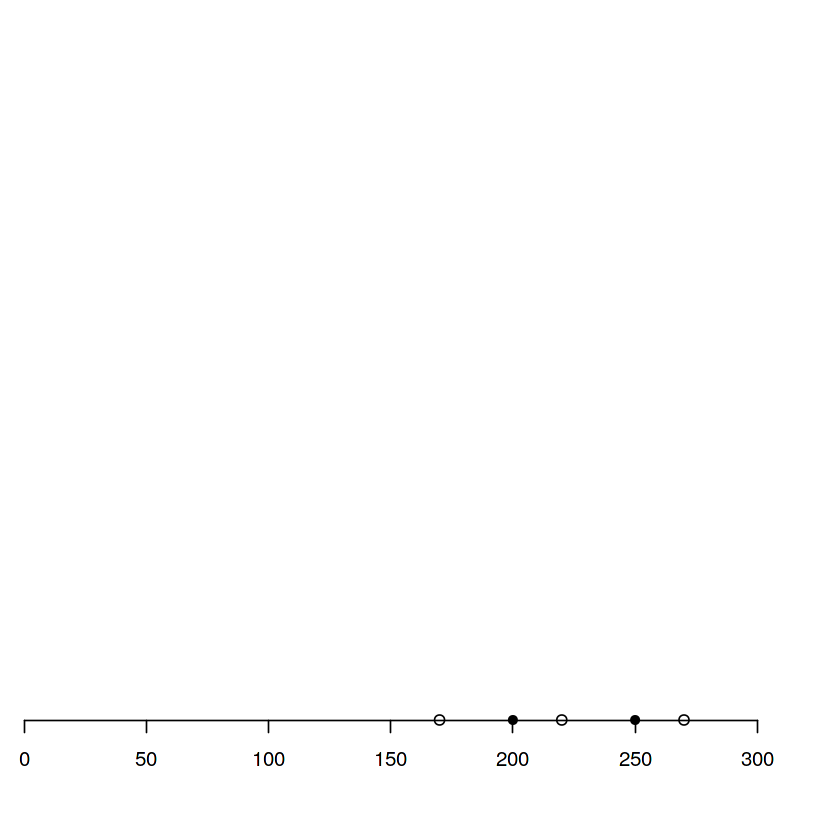

In [19]:
# plotting a graph with raw data - treated and controls
plot_data(food_kilos, tr, m_num = 1) 

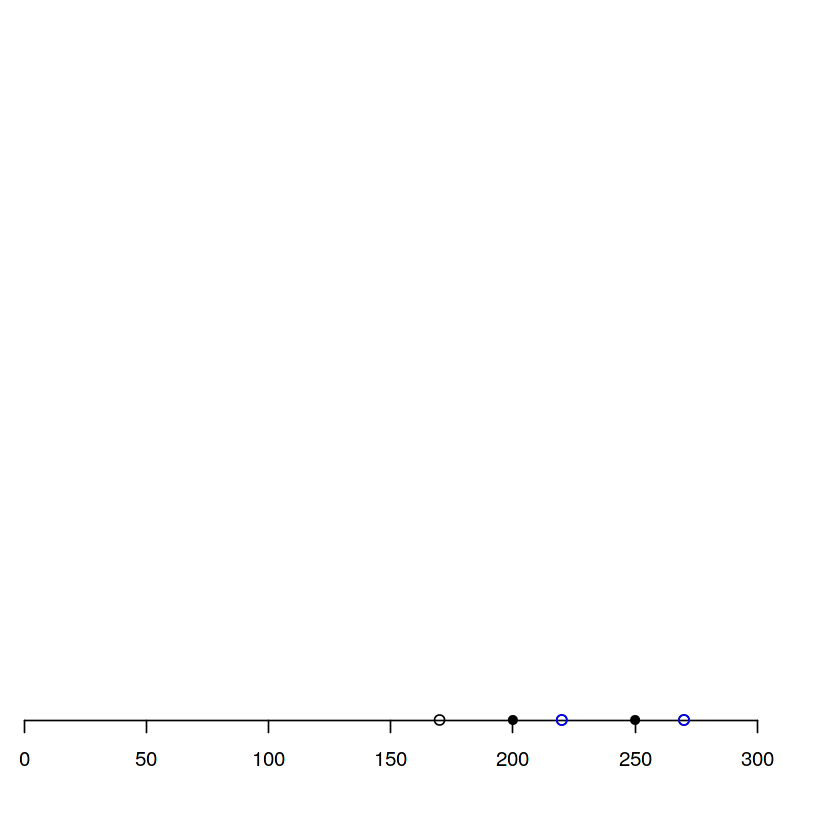

In [20]:
# plotting a graph with treated and 'synthetic' controls, when M = 1
synth_cont <- add_m_control(matchout_m1, data, m_num =1)
plot_data(food_kilos, tr, synth_cont, m_num = 1)

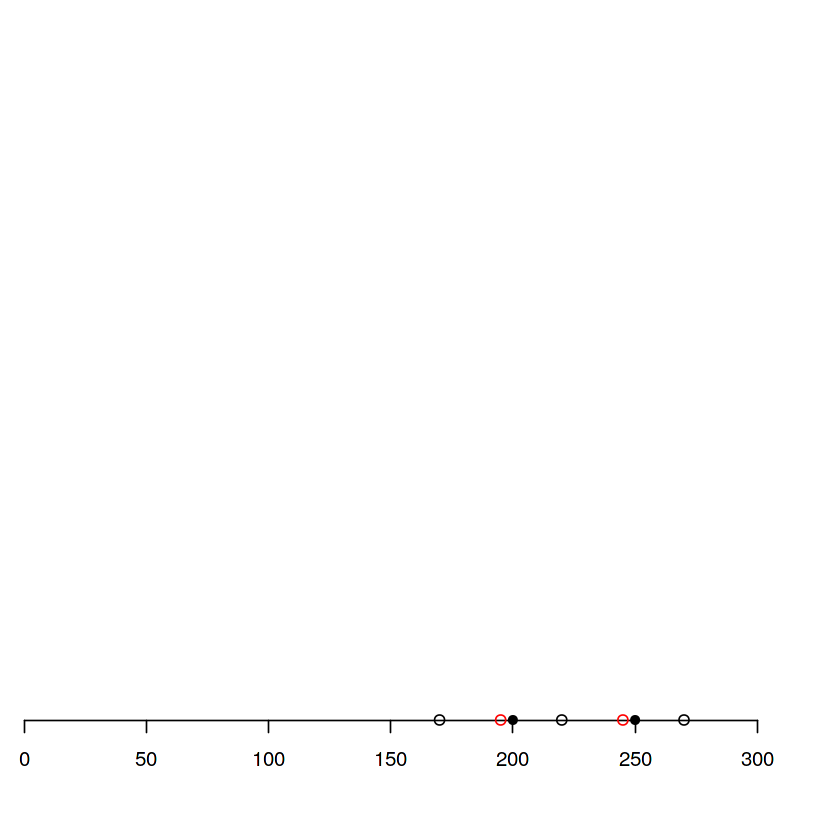

In [21]:
# plotting a graph with treated and 'synthetic' controls, when M = 2
synth_cont <- add_m_control(matchout_m2, data, m_num =2)
plot_data(food_kilos, tr, synth_cont, m_num = 2)

---

## Dataset 3

In [22]:
food_kilos <- c(5, 200, 225, 250, 275)
tr <- c(0,1,0, 1, 0)
data <- cbind(food_kilos, tr)

In [23]:
# M = 1 matching
genout_m1<- GenMatch(X = food_kilos, Tr = tr, M=1,  pop.size=200, max.generations=10, wait.generations=25, ties = FALSE)
matchout_m1 <- Match(X = food_kilos, Tr = tr, M=1, Weight.matrix=genout_m1, ties = FALSE)
matchout_m1$index.control
matchout_m1$index.treated

mb.out_m1 <- MatchBalance(tr~food_kilos, match.out = matchout_m1)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value



Mon Dec 16 11:16:59 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.639452e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 3 5

[1] 2 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........     168.33 	 	        250 
std mean diff.........     160.28 	 	    -70.711 

mean raw eQQ diff.....        110 	 	         25 
med  raw eQQ diff.....        110 	 	         25 
max  raw eQQ diff.....        195 	 	         25 

mean eCDF diff........        0.2 	 	       0.25 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	        0.5 

var ratio (Tr/Co).....   0.060582 	 	          1 
T-test p-value........    0.57142 	 	 < 2.22e-16 
KS Bootstrap p-value..      0.916 	 	      0.882 
KS Naive p-value......          1 	 	          1 
KS Statistic..........    0.33333 	 	        0.5 



[1] 0.5714216

[1] 0

In [24]:
# M = 2 matching
genout_m2<- GenMatch(X = food_kilos, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25)
matchout_m2 <- Match(X = food_kilos, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~food_kilos, match.out = matchout_m2)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Mon Dec 16 11:17:02 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 5.000000e-01  6.993742e-01  
#unique......... 200, #Total UniqueCount:

[1] 3 5 3 5

[1] 2 2 4 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........     168.33 	 	        250 
std mean diff.........     160.28 	 	    -70.711 

mean raw eQQ diff.....        110 	 	         25 
med  raw eQQ diff.....        110 	 	         25 
max  raw eQQ diff.....        195 	 	         25 

mean eCDF diff........        0.2 	 	       0.25 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	        0.5 

var ratio (Tr/Co).....   0.060582 	 	          1 
T-test p-value........    0.57142 	 	        0.5 
KS Bootstrap p-value..      0.914 	 	      0.468 
KS Naive p-value......          1 	 	    0.69937 
KS Statistic..........    0.33333 	 	        0.5 



[1] 0.5714216

[1] 0.468

#### What's going on? 1:1 is better than both no matching and 1:2 matching [1:2 < NO < 1:1  == 0.49 < 0.57 < 0.74]

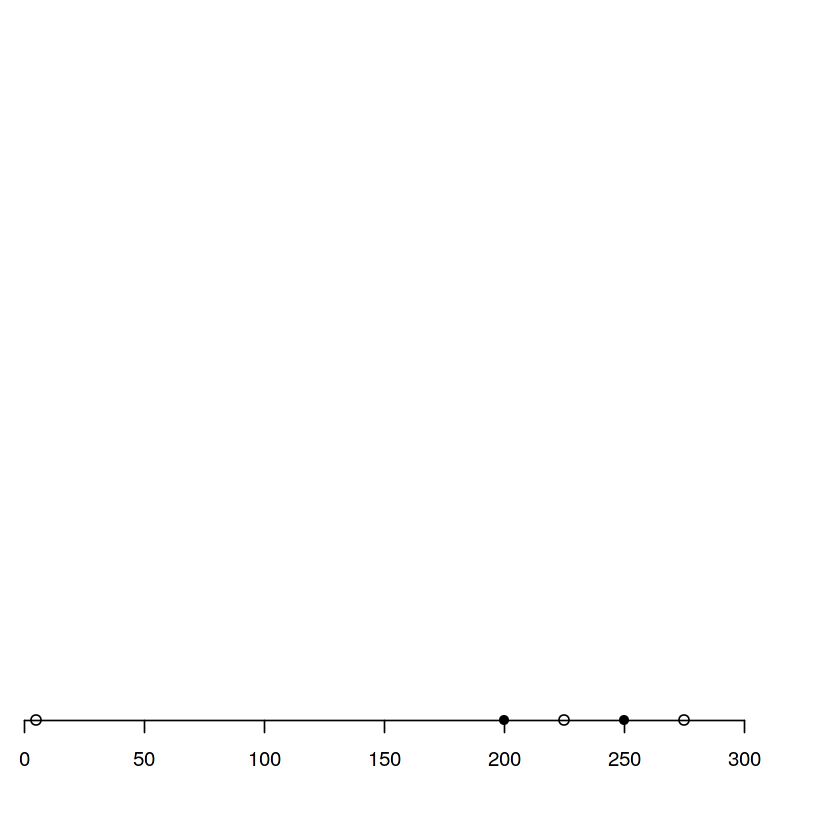

In [26]:
# plotting a graph with raw data - treated and controls
plot_data(food_kilos, tr, m_num = 1) 


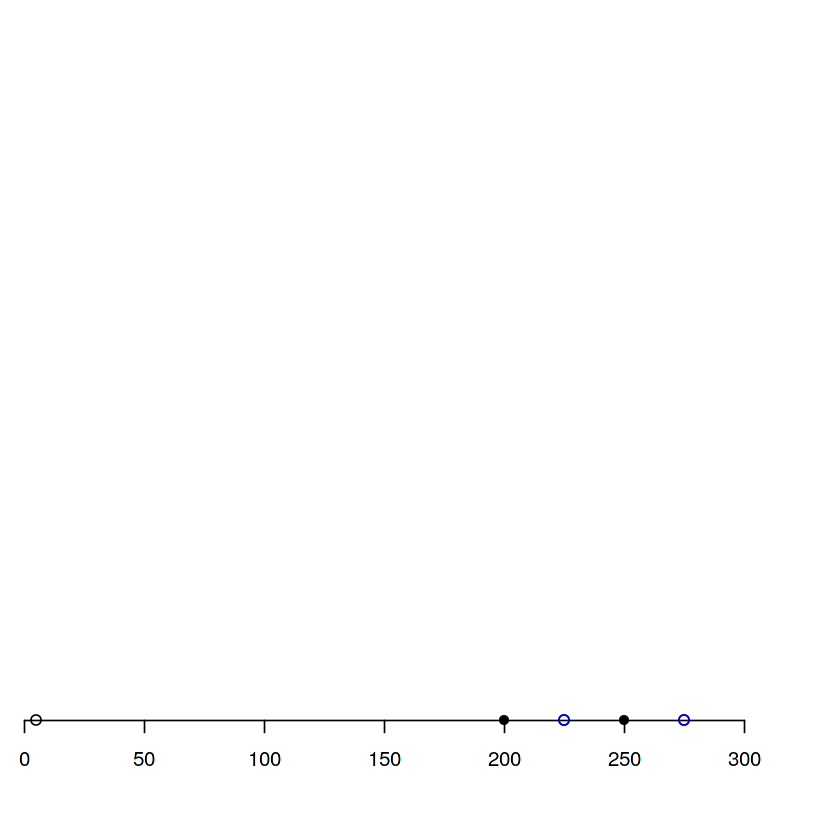

In [27]:
# plotting a graph with treated and 'synthetic' controls, when M = 1
synth_cont <- add_m_control(matchout_m1, data, m_num =1)
plot_data(food_kilos, tr, synth_cont, m_num = 1)

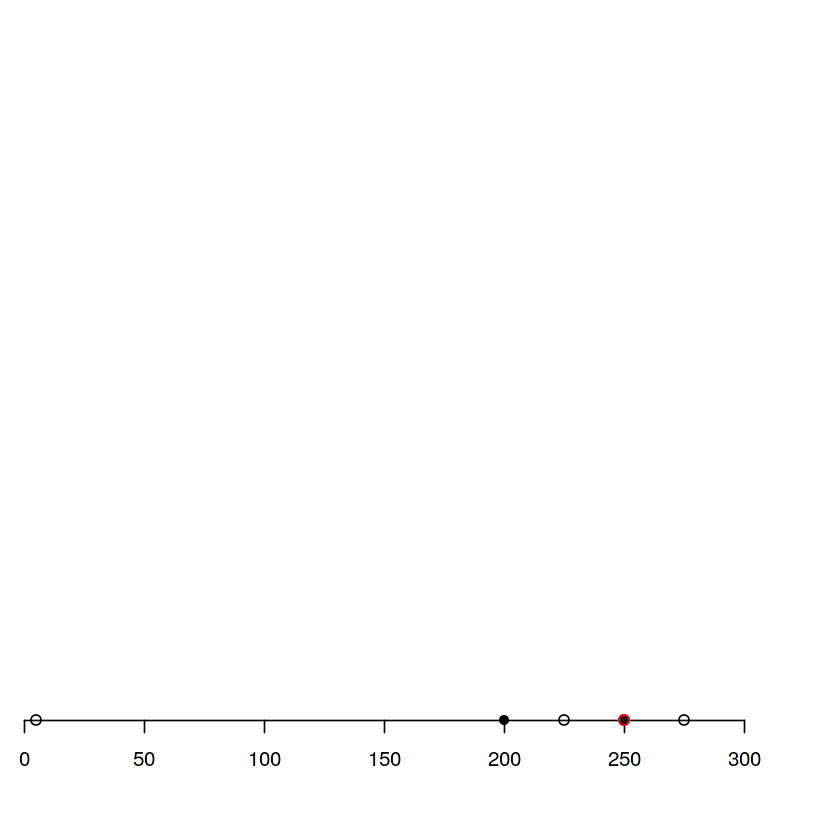

In [28]:
# plotting a graph with treated and 'synthetic' controls, when M = 2
synth_cont <- add_m_control(matchout_m2, data, m_num =2)
plot_data(food_kilos, tr, synth_cont, m_num = 2)

---

### Dataset 4A (with ties)

In [6]:
food_kilos <- c(180, 200, 220, 250, 280)
tr <- c(0,1,0, 1, 0)
data <- cbind(food_kilos, tr)

In [7]:
# M = 1 matching
genout_m1<- GenMatch(X = food_kilos, Tr = tr, M=1, pop.size=200, max.generations=10, wait.generations=25) 
matchout_m1 <- Match(X = food_kilos, Tr = tr, M=1, Weight.matrix=genout_m1) 
matchout_m1$index.control  
matchout_m1$index.treated 

mb.out_m1 <- MatchBalance(tr~food_kilos, match.out = matchout_m1, data = data)
mb.out_m1$BMsmallest.p.value 
mb.out_m1$AMsmallest.p.value 

Loading required namespace: rgenoud




Tue Dec 17 02:52:51 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.996333e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........     226.67 	 	        225 
std mean diff.........     -4.714 	 	          0 

mean raw eQQ diff.....         25 	 	         25 
med  raw eQQ diff.....         25 	 	         25 
max  raw eQQ diff.....         30 	 	         30 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....    0.49342 	 	     0.4902 
T-test p-value........    0.96815 	 	          1 
KS Bootstrap p-value..       0.92 	 	      0.986 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.92

[1] 0.986

#### What's going on? 1:1 matching is better than no matching: [NO < 1:1 == 0.918  < 0.97]

In [8]:
# M = 2 matching
genout_m2<- GenMatch(X = food_kilos, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25)
matchout_m2 <- Match(X = food_kilos, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~food_kilos, match.out = matchout_m2, data = data)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Tue Dec 17 02:52:58 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.996333e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        225 	 	        225 
mean control..........     226.67 	 	        225 
std mean diff.........     -4.714 	 	          0 

mean raw eQQ diff.....         25 	 	         25 
med  raw eQQ diff.....         25 	 	         25 
max  raw eQQ diff.....         30 	 	         30 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....    0.49342 	 	     0.4902 
T-test p-value........    0.96815 	 	          1 
KS Bootstrap p-value..      0.918 	 	       0.97 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.918

[1] 0.97

#### What's going on? 1:2 matching is as good as 1:1 matching and they are better than NO matching [NO < 1:1 = 1:2 == 0.916 < 0.978 = 0.97]

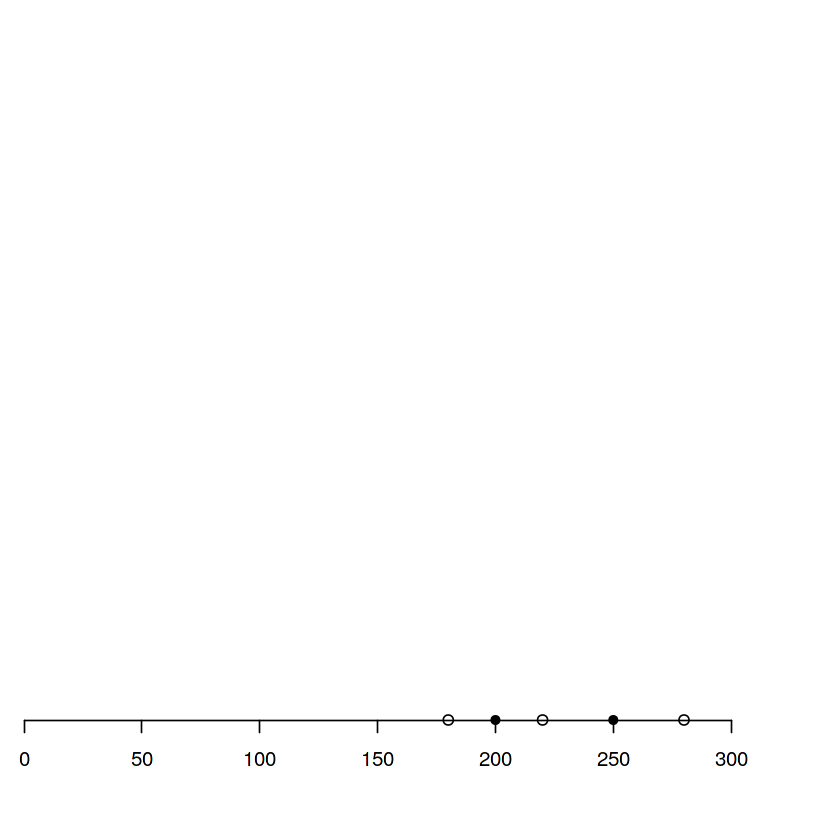

In [35]:
# plotting a graph with raw data - treated and controls
plot_data(food_kilos, tr, m_num = 1) 

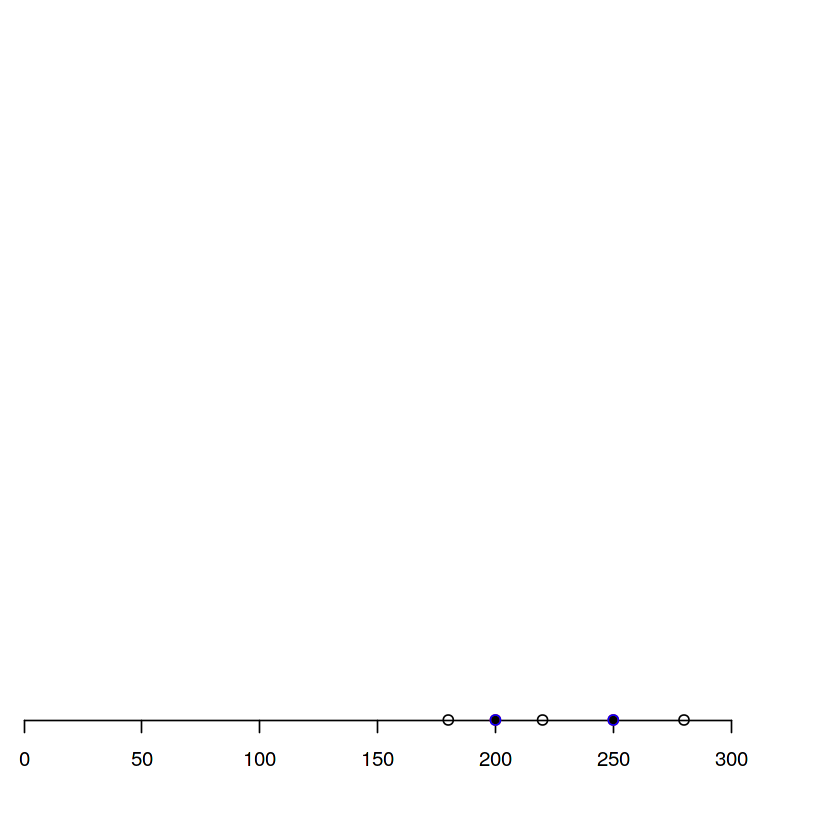

In [9]:
# plotting a graph with treated and 'synthetic' controls, when M = 1
synth_cont <- add_m_control(matchout_m1, data, m_num =2) # m_num = 2, because matching woth ties is equivalent to M=2
plot_data(food_kilos, tr, synth_cont, m_num = 2)
points(x = c(200, 250), y = c(0, 0), col="blue",xpd=NA)

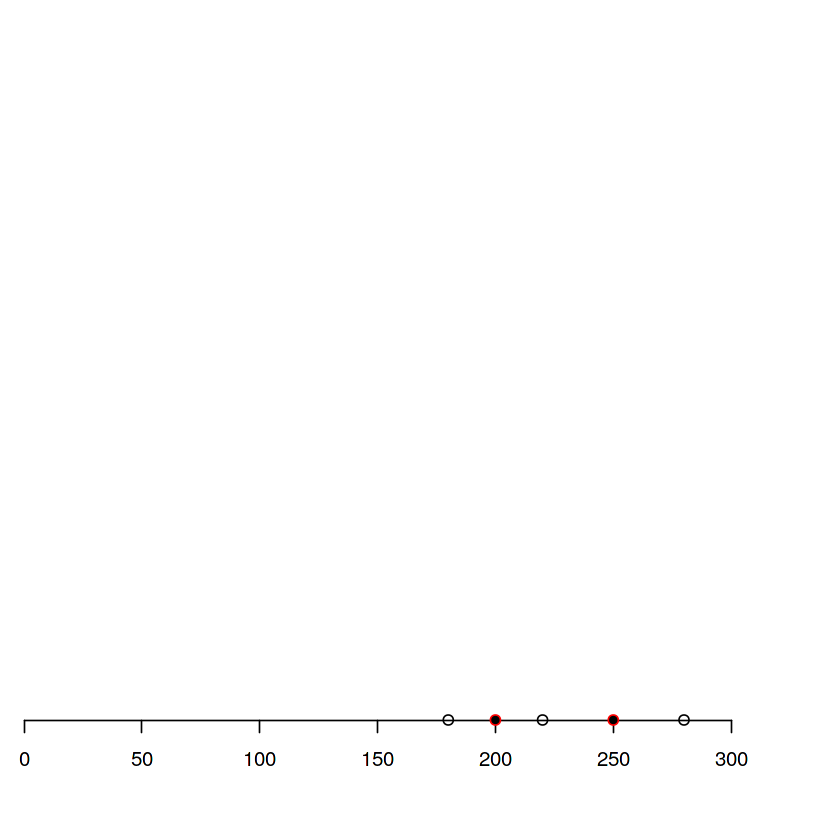

In [34]:
# plotting a graph with treated and 'synthetic' controls, when M = 2
synth_cont <- add_m_control(matchout_m2, data, m_num =2)
plot_data(food_kilos, tr, synth_cont, m_num = 2)

---

### Dataset 5 

In [47]:
food_kilos <- c(200, 200, 200, 200, 200) 
tr <- c(0,1,0, 1, 0)
data <- cbind(food_kilos, tr)

In [49]:
# M=1 matching
genout_m1<- GenMatch(X = food_kilos, Tr = tr, M=1,  pop.size=200, max.generations=10, wait.generations=25, ties = F)
matchout_m1 <- Match(X = food_kilos, Tr = tr, M=1, Weight.matrix=genout_m1, ties = F)
matchout_m1$index.control
matchout_m1$index.treated

mb.out_m1 <- MatchBalance(tr~food_kilos, match.out = matchout_m1, data = data)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value



Mon Dec 16 11:30:31 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 1.000000e+00  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 5 5

[1] 2 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        200 	 	        200 
mean control..........        200 	 	        200 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....          0 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          0 

mean eCDF diff........          0 	 	          0 
med  eCDF diff........          0 	 	          0 
max  eCDF diff........          0 	 	          0 

var ratio (Tr/Co).....        NaN 	 	        NaN 
T-test p-value........          1 	 	          1 



[1] 1

[1] 1

#### What's going on? 1:1 matching is as good as no matching [1:1 = NO == 1 = 1]
 - the homogeneity of the data and lack of any variance in control and treated units distributions.

In [50]:
# M=2 matching
genout_m2<- GenMatch(X = food_kilos, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25, ties = F)

matchout_m2 <- Match(X = food_kilos, Tr = tr, M=2, Weight.matrix=genout_m2, ties = F)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~food_kilos, match.out = matchout_m2, data = data)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Mon Dec 16 11:30:38 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 1.000000e+00  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 3 5 1 5

[1] 2 2 4 4


***** (V1) food_kilos *****
                       Before Matching 	 	 After Matching
mean treatment........        200 	 	        200 
mean control..........        200 	 	        200 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....          0 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          0 

mean eCDF diff........          0 	 	          0 
med  eCDF diff........          0 	 	          0 
max  eCDF diff........          0 	 	          0 

var ratio (Tr/Co).....        NaN 	 	        NaN 
T-test p-value........          1 	 	          1 



[1] 1

[1] 1

#### What is going on? 1:1, 1:2 and no matching are all equally ecxcellent!  [1:1 = NO = 1:2 == 1 = 1 = 1]

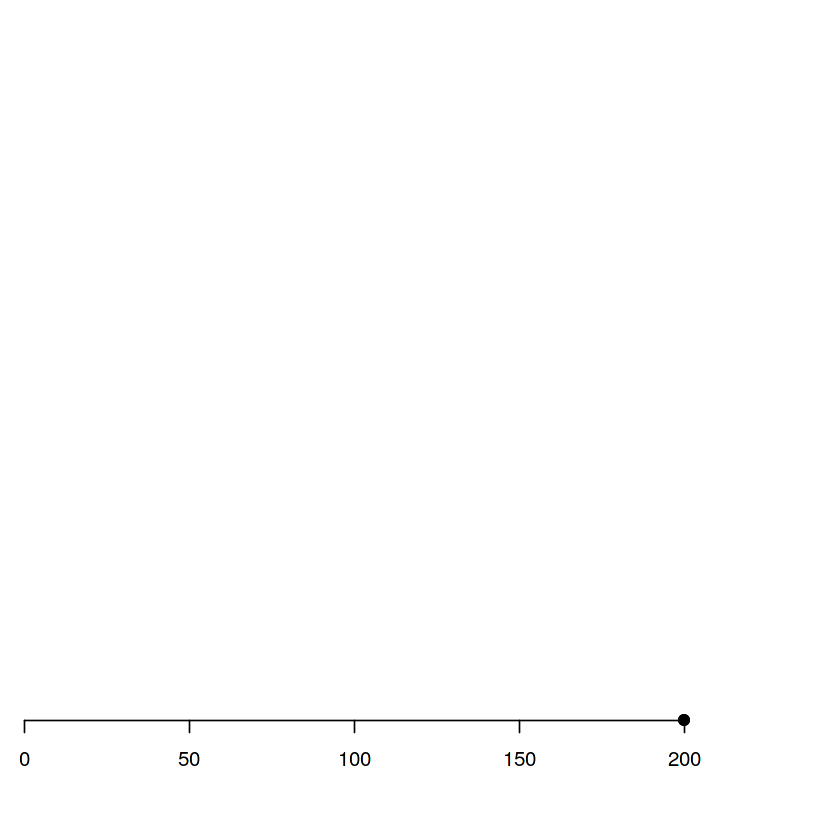

In [51]:
# plotting a graph with raw data - treated and controls
plot_data(food_kilos, tr, m_num = 1) 

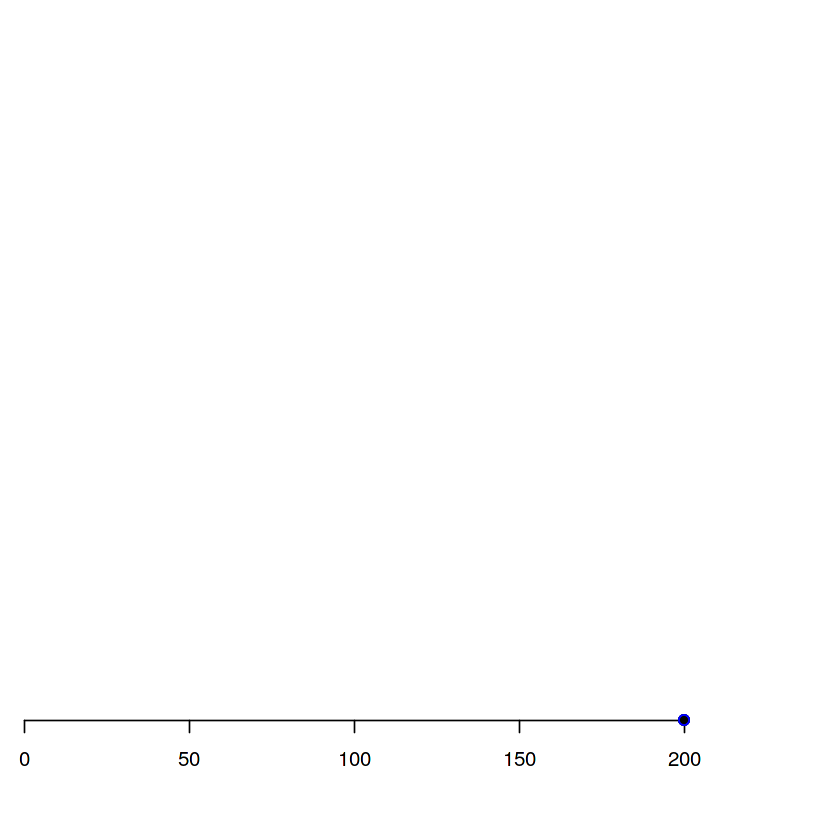

In [52]:
# plotting a graph with treated and 'synthetic' controls, when M = 1
synth_cont <- add_m_control(matchout_m1, data, m_num =1)
plot_data(food_kilos, tr, synth_cont, m_num = 1)

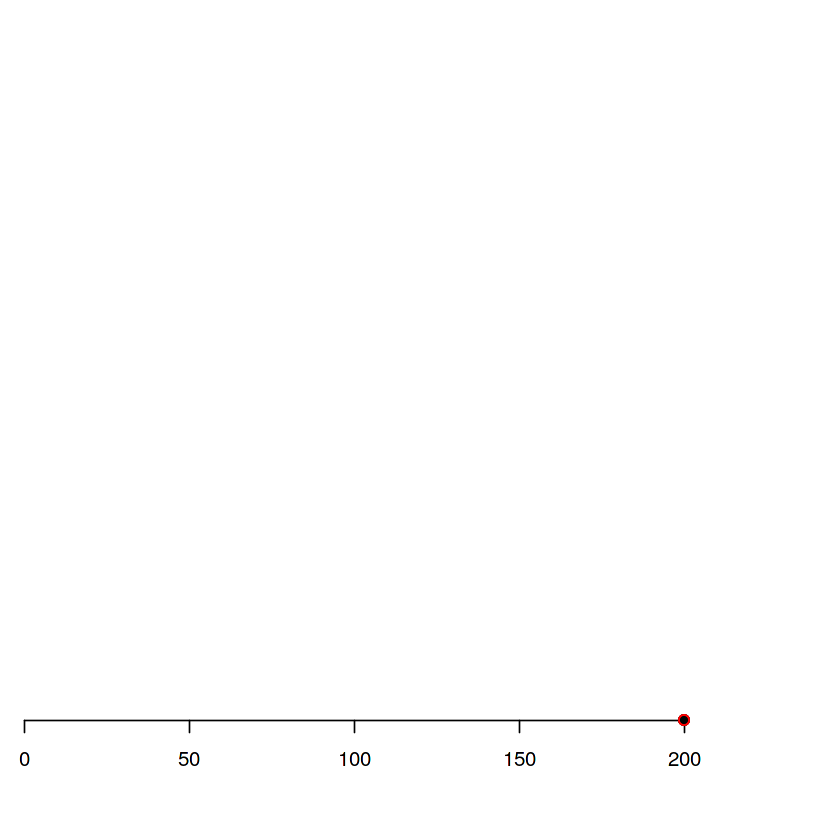

In [53]:
# plotting a graph with treated and 'synthetic' controls, when M = 2
synth_cont <- add_m_control(matchout_m2, data, m_num =2)
plot_data(food_kilos, tr, synth_cont, m_num = 2)

---

## Appendix

### Function used for plotting control, treated, and 'synthetic' control values 

In [3]:
# Adding the "synthetic" control from multiple matching
add_m_control <- function(matchout, data, m_num) { # gets as input the output from Match / GenMatch
    # Create two vectors to store in values 
    treated <- c() # vector to collect one time instances of treated units that got matched
    syn_c_matches <- c() # vector to collect final composite "synthetic" match for treated units
    # Get the values for the matches
    m <- matchout$matches # get the treated units, control matches, and weights: a vector
    t <- matchout$index.treated # get the treated units indeces: a vector
    c <- matchout$index.control # and the matched control units: a vector
    w <- matchout$weights # and the weight given to each match: a vector
 
    for (i in seq(from = 1, to =length(t), by = m_num)) { # loop through all the matched treated units
        c_match <- data[c[i]] # get match corresponding to treated unit
        w_match <- w[i] # get corresponding weight
        w_c_match <- c_match*w_match # calculate the weighted value of the multiple match control unit 
        if (m_num != 1){
            c_match2 <- data[c[i+1]] # get corresponding match
            w_match2 <- w[i+1] # get corresponding weight
            w_c_match2 <- c_match2*w_match2 # calculate the weighted value of the multiple match control unit 
            syn_c_match <- w_c_match + w_c_match2 # add it to the final composite ("syn") control match 
        }
        if (m_num == 1) {
            syn_c_match <- w_c_match
        }
        syn_c_matches <- append(syn_c_matches, syn_c_match)
    }   
return (syn_c_matches) # return the final "synthetic" matches for treated
}

In [4]:
# Create a function called plotting the axes
plot_data <- function(data, assignment, add_data=NULL, m_num = NULL) {

    # Get values from generated / passed data
    pt_max <- max(data) # find the biggest value
    controls_i <- which(assignment[] == 0) # identify indexes of controls
    controls <- data[controls_i]
    treated_i <- which(assignment[] == 1) # identify indexes of treated
    treated <- data[treated_i]

    # Define plot data
    xlim <- c(0,pt_max*1.2) # set axis to be slightly bigger than the length of the data 
    ylim <- c(0,100) # ...   

    px_control <- controls # define x-values for control pts
    py_control <- rep(0, length(px_control)) # define y-values for control pts (0)
    px_treated <- treated # define x-values for treated pts
    py_treated <- rep(0, length(px_treated)) # define y-values for treated pts (0)
    
    px_syn <- add_data # define x-values for composite "synthesized" control match
    py_syn <- rep(0, length(px_syn)) # define y-values for treated pts (0)

    # Create basic plot outline
    par(xaxs='i',yaxs='i',mar=c(5,1,1,1))
    plot(NA,xlim=xlim,ylim=ylim,axes=F,ann=F)
    axis(1)

    # Plot elements
    points(px_control,py_control,xpd=NA)
    points(px_treated,py_treated,pch=16,xpd=NA)  # what does xpd mean?
    if (m_num != 1){
            points(px_syn, py_syn,col="red",xpd=NA)
    }else {
        points(px_syn, py_syn,col="blue",xpd=NA)
    }

}